<h4>Task-33: Using opencv perform thresholding , global thersholding, adaptive threshholding, otsu thresholding, Edge detection(Sobel edge detection, laplacian edge detection, canny edge detector) and hough line transformation and show results in separate plots.</h4>


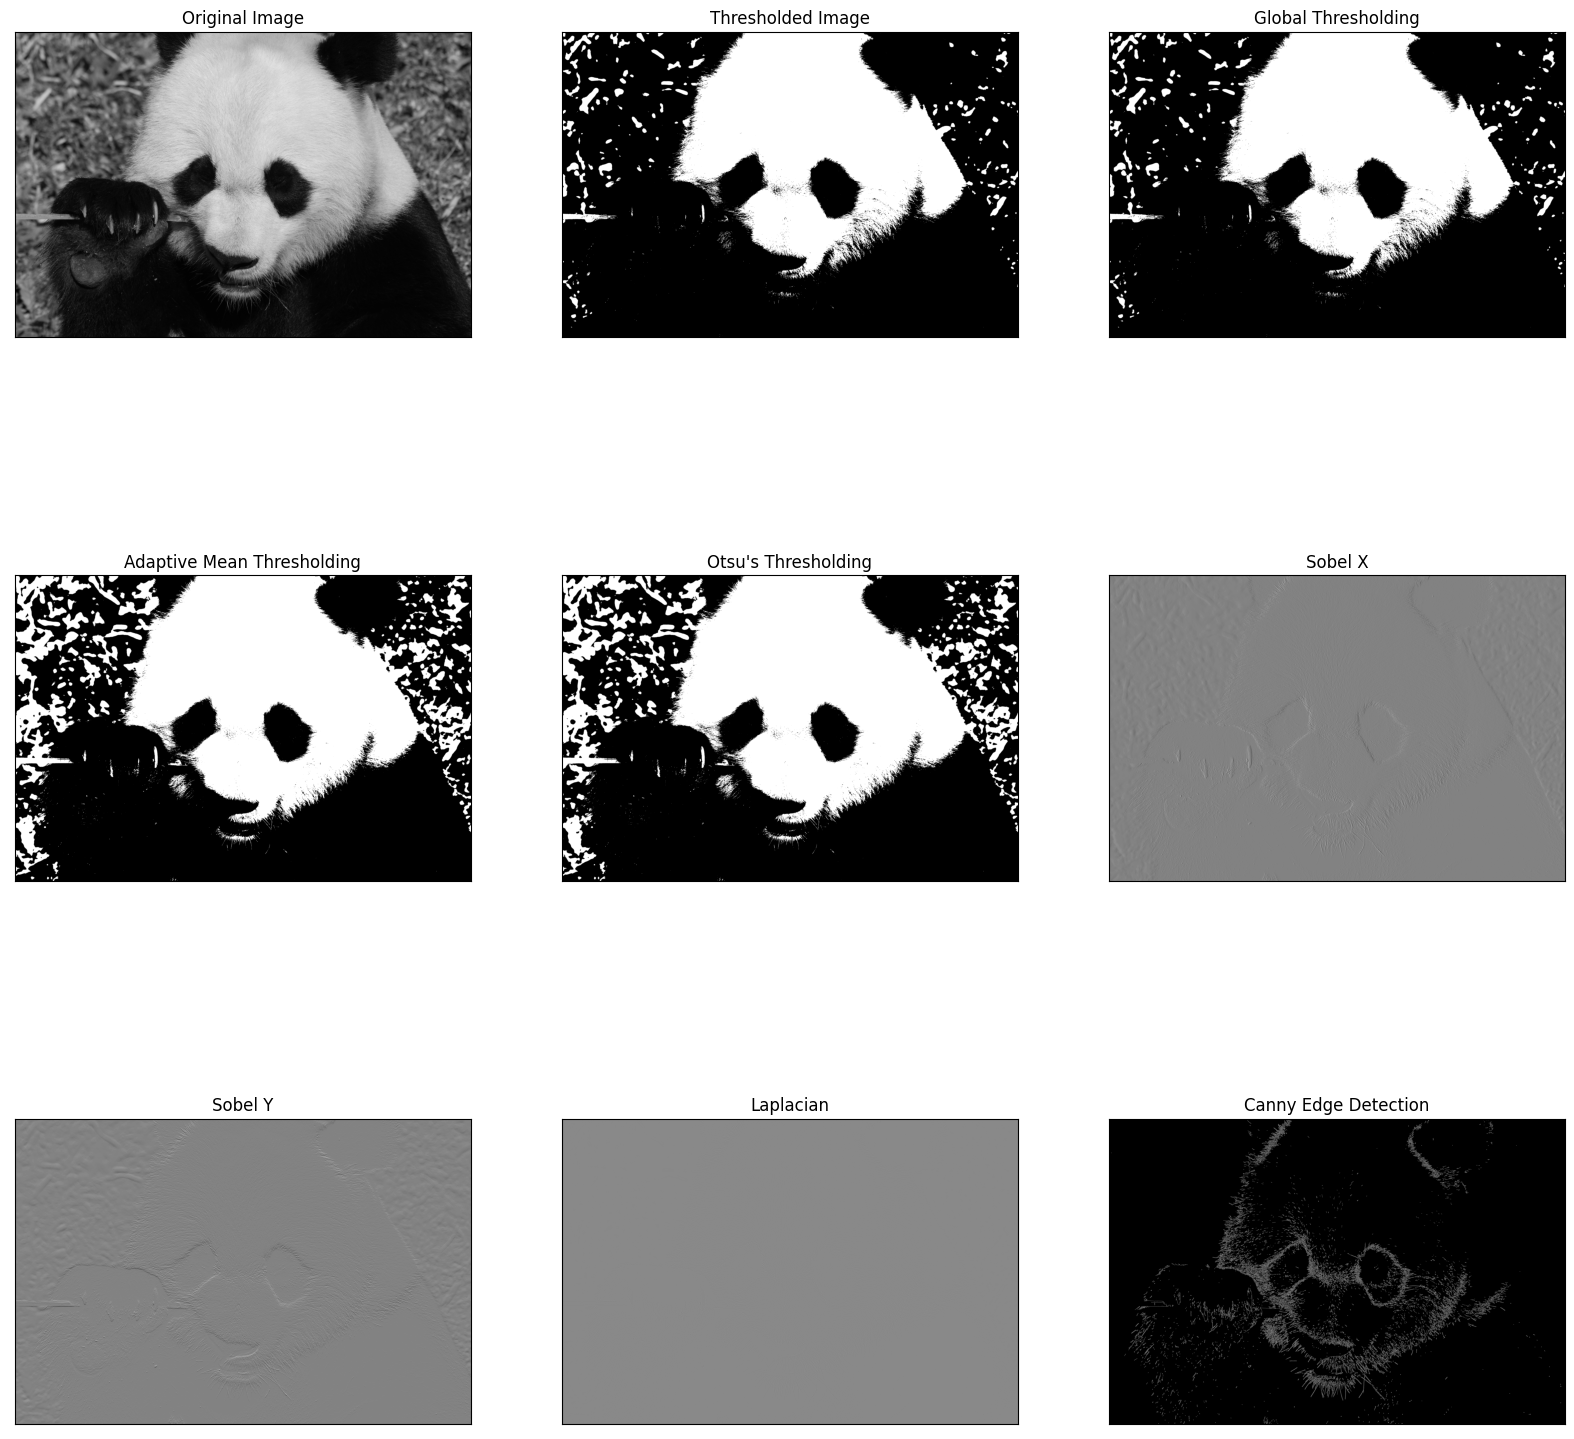

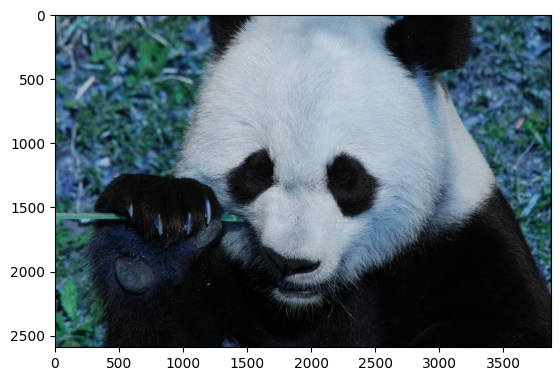

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('photo.jpg')

img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Thresholding
threshold_value=127
ret,thresh1=cv2.threshold(img_gray,threshold_value,255,cv2.THRESH_BINARY)

#global thresholding
ret1,th1=cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

#adaptive thresholding
th2=cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

#Otsu's thresholding
ret2,th2=cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#sobel edge detection
sobelx=cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=5)

#laplacian edge detection
laplacian=cv2.Laplacian(img_gray,cv2.CV_64F)

#Canny edge detection
edges=cv2.Canny(img_gray,100,200)

#hougline transform
minLineLength=100
maxLineGap=10
lines=cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

#plot all the images in single figure
plt.figure(figsize=(20,20))
plt.subplot(331),plt.imshow(img_gray,cmap='gray')
plt.title('Original Image'),plt.xticks([]),plt.yticks([])
plt.subplot(332),plt.imshow(thresh1,cmap='gray')
plt.title('Thresholded Image'),plt.xticks([]),plt.yticks([])
plt.subplot(333),plt.imshow(th1,cmap='gray')
plt.title('Global Thresholding'),plt.xticks([]),plt.yticks([])
plt.subplot(334),plt.imshow(th2,cmap='gray')
plt.title('Adaptive Mean Thresholding'),plt.xticks([]),plt.yticks([])
plt.subplot(335),plt.imshow(th2,cmap='gray')
plt.title("Otsu's Thresholding"),plt.xticks([]),plt.yticks([])
plt.subplot(336),plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])
plt.subplot(337),plt.imshow(sobely,cmap='gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])
plt.subplot(338),plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian'),plt.xticks([]),plt.yticks([])
plt.subplot(339),plt.imshow(edges,cmap='gray')
plt.title('Canny Edge Detection'),plt.xticks([]),plt.yticks([])
plt.show()


#print huoghline transform
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(img,cmap='gray')
plt.show()

<h4>Task-34: Manuallly perfrom Thresholding on a grayscale image</h4>

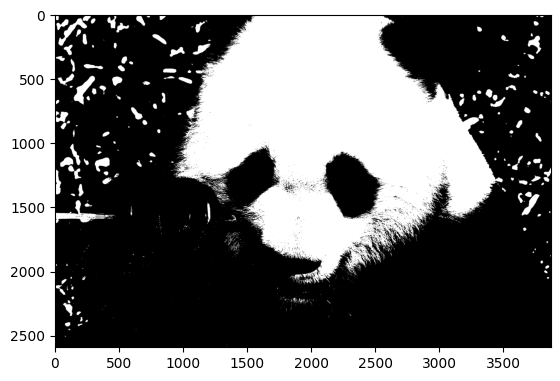

In [2]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#mannual thresholding
threshold_value=127
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        if img_gray[i,j]>threshold_value:
            img_gray[i,j]=255
        else:
            img_gray[i,j]=0

plt.imshow(img_gray,cmap='gray')

<h4>Task-35: Manually perform sobel edge detection with first-order derivative in the x-direction and the y-direction. Show the results in a single plot.</h4>

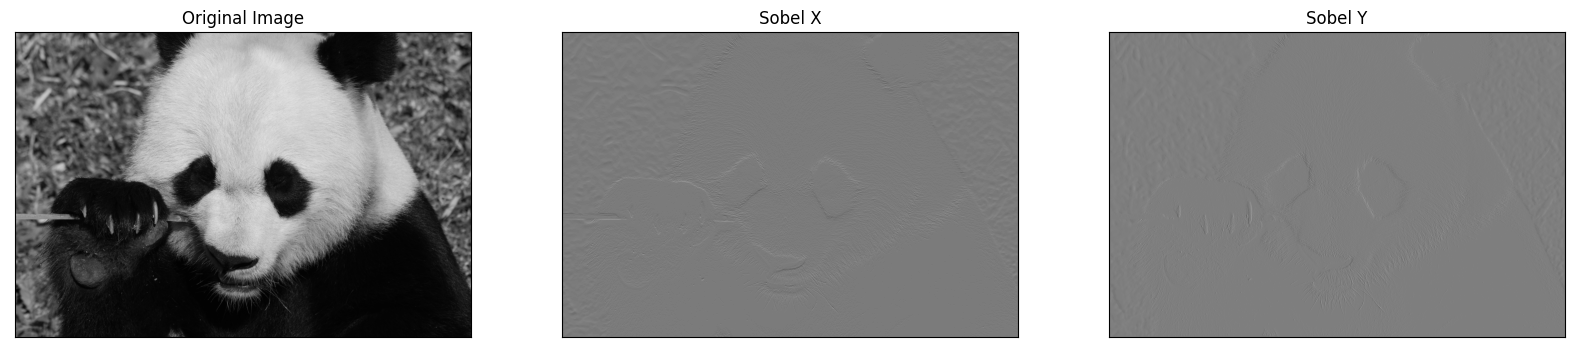

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('photo.jpg')

img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Get user input for kernel size
kernel_size = int(input("Enter kernel size (odd number): "))

# Check if kernel size is odd
if kernel_size % 2 == 0:
    kernel_size += 1

# Generate Sobel filter kernels
gx = np.zeros((kernel_size, kernel_size))
gy = np.zeros((kernel_size, kernel_size))

value = kernel_size // 2
center = value

#for gx kernel
for i in range(kernel_size):
    for j in range(kernel_size):
        if j == center and i != center:
            gx[i, j] = value*2
        else:
            
            gx[i, j] = value
        
    value -= 1

# for gy kernel
value = kernel_size // 2
for i in range(kernel_size):
    for j in range(kernel_size):
        if j == center and i != center:
            gy[j, i] = value*2
        else:
            gy[j, i] = value
        
    value -= 1



#apply sobel filter on image using gx and gy kernel manually
img_sobelx = np.zeros(img_gray.shape)
img_sobely = np.zeros(img_gray.shape)

for i in range(img_gray.shape[0]-kernel_size):
    for j in range(img_gray.shape[1]-kernel_size):
        img_sobelx[i, j] = np.sum(img_gray[i:i+kernel_size, j:j+kernel_size] * gx)
        img_sobely[i, j] = np.sum(img_gray[i:i+kernel_size, j:j+kernel_size] * gy)

#plot all the images in single figure
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img_gray,cmap='gray')
plt.title('Original Image'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(img_sobelx,cmap='gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(img_sobely,cmap='gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])
plt.show()
